# Example 2. Bootstrap Aggregation
---
The **Bootstrap Aggregation**, also called **Bagging method**, is the an ensemble method aggregating the models, which are generated by **random sampling with replacement** of training data, and using the [Majority voting aggregation](example_01_majorityVote) method to have final decision. The method splits training data to many subsets, then they are randomly pick and composed to a new training data repeatedly. Since the subset will be put back to data after every picking, the subset is possible to have duplicate in new training data. Thus, it is also called **bootstrap sample** as shown in the Fig.

![bootrap_concept.png](../doc/bootrap_concept.png)

Each bootstrap sample will generate a individual trained model, then we ensemble these trained models by voting aggregation method and obtain the result. However, since there must be some of subsets are pick for a bootstrap sample, the rest of them is decided to be test sample for the correspoding model. Thus, the **Bagging method** is similar to **Majority voting aggregation** and it can do the validation during training as well.

### Import package and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing   import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
le = LabelEncoder()
df_wine = pd.read_csv('../data/wine.data')
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
                   'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanolds', 
                   'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 
                   'Hue', 'OD280/OD315 of diluted wines', 'Proline']
# Only use class 2 and 3
df_wine = df_wine[df_wine['Class label']!=1]
y = le.fit_transform(df_wine['Class label'].values)
X = df_wine[['Alcohol', 'Hue']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

### 1. Single model with decision tree

In [3]:
from sklearn.tree     import DecisionTreeClassifier
from sklearn.metrics  import accuracy_score

In [4]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=None)

In [5]:
# Fit the decision tree
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred  = tree.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test  = accuracy_score(y_test,  y_test_pred)
print 'Decision tree train/test accuracies %.3f/%.3f'%(tree_train, tree_test)

Decision tree train/test accuracies 1.000/0.833


* **The decision tree model is overfiting, let's see if we can improve it by bagging method.**

### 2. Bagging the decision trees

In [6]:
from sklearn.ensemble import BaggingClassifier

In [7]:
bag = BaggingClassifier(base_estimator=tree, 
                        n_estimators=500, 
                        max_samples=1., 
                        max_features=1., 
                        bootstrap=True, 
                        bootstrap_features=False, 
                        n_jobs=1, 
                        random_state=1)

In [8]:
# Fit the bagging method
bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred  = bag.predict(X_test)
bag_train = accuracy_score(y_train, y_train_pred)
bag_test  = accuracy_score(y_test,  y_test_pred)
print 'Decision tree train/test accuracies %.3f/%.3f'%(bag_train, bag_test)

Decision tree train/test accuracies 1.000/0.896


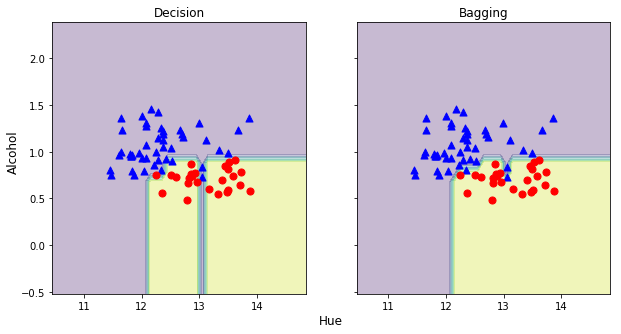

In [9]:
# Plot the decision regions
x_min = X_train[:, 0].min() - 1
x_max = X_train[:, 0].max() + 1
y_min = X_train[:, 1].min() - 1
y_max = X_train[:, 1].max() + 1 
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
f, axarr = plt.subplots(nrows=1, ncols=2, sharex='col', sharey='row', figsize=(10,5))

for idx, clf, label in zip([0, 1], [tree, bag], ['Decision', 'Bagging']):
    clf.fit(X_train, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter( X_train[y_train==0,0], X_train[y_train==0,1], c='blue', marker='^', s=50)
    axarr[idx].scatter( X_train[y_train==1,0], X_train[y_train==1,1], c='red',  marker='o', s=50) 
    axarr[idx].set_title(label)
    
plt.text(10,  -0.8, s='Hue',     ha='center', va='center', fontsize=12)
plt.text(4.5, 1,    s='Alcohol', ha='center', va='center', fontsize=12, rotation=90)
plt.show()

* **The bagging method improve the decision tree's results, reducing the overfitting problem and having much better accuracy prediction.**